## Common Function 

In [72]:
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        filter_mask = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
        df_filtered = df_filtered[filter_mask]
    return df_filtered

def remove_outliers_quantile(df, columns, quantile=0.95):
    df_filtered = df.copy()
    for col in columns:
        threshold = df[col].quantile(quantile)
        df_filtered = df_filtered[df_filtered[col] <= threshold]  # Keep only values below 95th percentile
    return df_filtered

## GovHK Data Analysis

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880059 entries, 0 to 880058
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             880059 non-null  object 
 1   lamppost_district_en  880059 non-null  object 
 2   lamppost_location_en  880059 non-null  object 
 3   no                    869061 non-null  float64
 4   no2                   869106 non-null  float64
 5   pm25                  869039 non-null  float64
dtypes: float64(3), object(3)
memory usage: 40.3+ MB
None

Summary Statistics:

Missing Values:
timestamp                   0
lamppost_district_en        0
lamppost_location_en        0
no                      10998
no2                     10953
pm25                    11020
dtype: int64

Duplicate Rows: 0


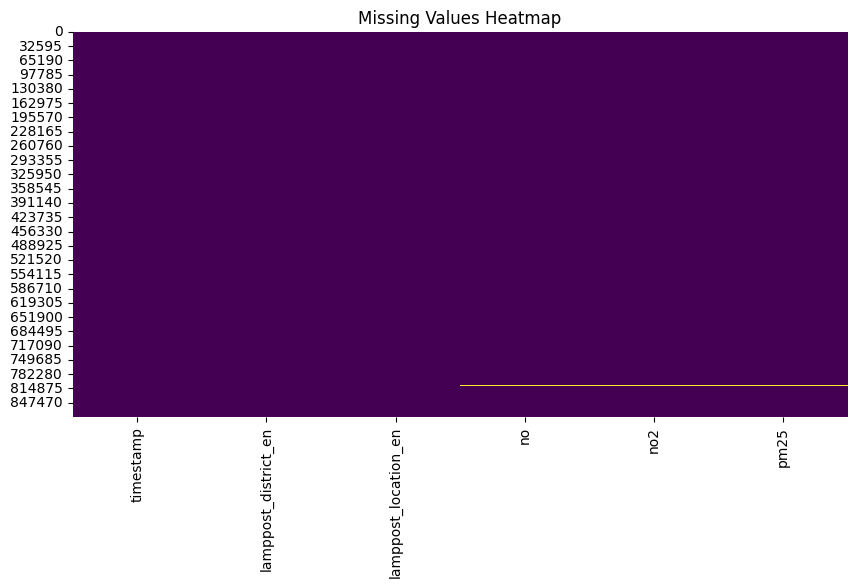

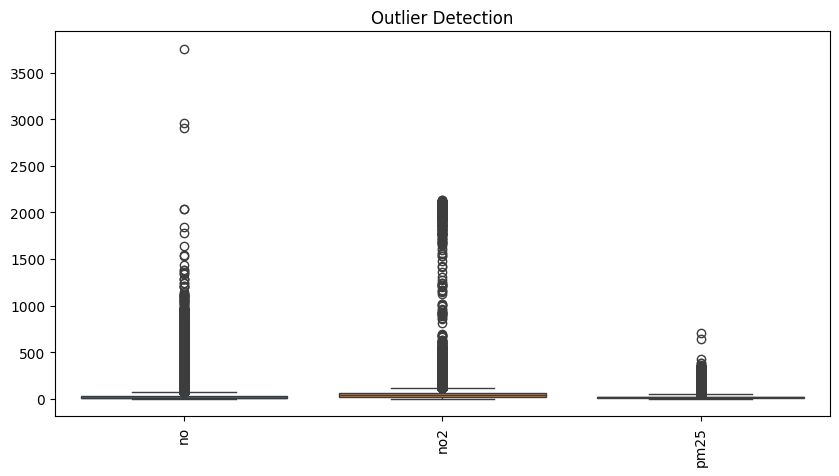

['lamppost_district_en', 'lamppost_location_en']
Column: lamppost_district_en
['Central and Western' 'Kowloon City' 'Yau Tsim Mong' 'Sai Kung'
 'Wan Chai' 'Kwun Tong']
------------------------------
Column: lamppost_location_en
['Connaught Road Central' 'Shing Kai Road near Tak Long Estate'
 'Avenue of Stars near Shangri-La' 'Hong Kong Space Museum'
 'Canton Road near Ocean Centre' 'Canton Road near The Gateway Tower'
 'ARQ - On Kin Road' 'ARQ - On Yu Road' 'Harbour Road'
 'Harcourt Road near Tim Mei Avenue' 'ARQ - On Hei Street']
------------------------------
Column: no, Min: 0.0, Max: 3753.4848 , Mean:26.86172056083521
Column: no2, Min: 0.0, Max: 2136.47666 , Mean:49.328753736732544
Column: pm25, Min: 0.0, Max: 707.3000000000001 , Mean:18.122687948028425


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_gov = pd.read_csv("../data/air_quality_gov.csv") 

# Check basic info
print("Basic Info:")
print(df_gov.info())

# Summary statistics
print("\nSummary Statistics:")
# print(df_gov.describe(include="all"))  # Show stats for numerical & categorical

# Check missing values
print("\nMissing Values:")
print(df_gov.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df_gov.duplicated().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df_gov.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gov.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Check Category
cat_cols = ["lamppost_district_en", "lamppost_location_en"]
print(cat_cols)
for col in cat_cols:
    print(f"Column: {col}")
    print(df_gov[col].unique())  # Show unique categories
    print("-" * 30)
   
# Check Min, Max, Mean
stat_columns = ["no", "no2", "pm25"] 
for col in stat_columns:
    mean = df_gov[col].mean()
    min_val = df_gov[col].min()
    max_val = df_gov[col].max()
    count = len(df_gov[col])
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")

    

## GovHK Data Cleansing


Check NA value:
timestamp               0
lamppost_district_en    0
lamppost_location_en    0
no                      0
no2                     0
pm25                    0
dtype: int64

Duplicate Rows: 0


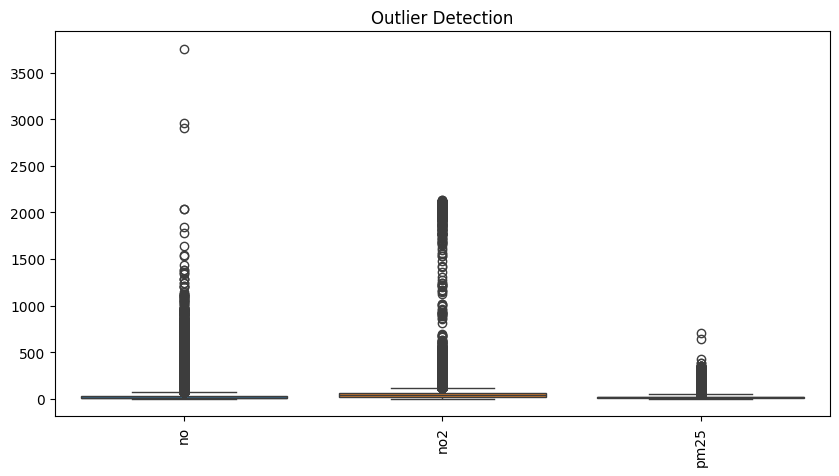

Column: no, Min: 0.0, Max: 3753.4848 , Mean:26.904179103331575
Column: no2, Min: 0.0, Max: 2136.47666 , Mean:49.388232663518046
Column: pm25, Min: 0.0, Max: 707.3000000000001 , Mean:18.11819503647962

Summary Statistics:
                       timestamp lamppost_district_en    lamppost_location_en  \
count                     866831               866831                  866831   
unique                     99365                    6                      11   
top     2025-02-28T14:30:00.000Z        Yau Tsim Mong  Connaught Road Central   
freq                          11               378833                   99113   
mean                         NaN                  NaN                     NaN   
std                          NaN                  NaN                     NaN   
min                          NaN                  NaN                     NaN   
25%                          NaN                  NaN                     NaN   
50%                          NaN                  

In [96]:
# Drop Null
df_gov = pd.read_csv("../data/air_quality_gov.csv") 
df_gov = df_gov.dropna()
print("\nCheck NA value:")
print(df_gov.isna().sum())
 
# Remove Duplicates
df_gov.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", df_gov.duplicated().sum())

# Filter Outlier
gov_columns = ["no","no2","pm25"]
df_gov_filtered = df_gov    
# df_gov_filtered = remove_outliers_quantile(df_gov, gov_columns)    

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gov_filtered.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Check Min, Max, Mean
for col in gov_columns:
    mean = df_gov_filtered[col].mean()
    min_val = df_gov_filtered[col].min()
    max_val = df_gov_filtered[col].max()
    count = len(df_gov[col])
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")

# Summary statistics
print("\nSummary Statistics:")
print(df_gov_filtered.describe(include="all"))



## Data Transformation

In [108]:
# Round timestamp to the nearest hour
df_gov_filtered["timestamp"] = pd.to_datetime(df_gov_filtered["timestamp"]).dt.tz_localize(None)
df_gov_filtered["report_datetime"] = df_gov_filtered["timestamp"].dt.floor("h")

# Group by hourly timestamp, district, and location, then calculate the mean for no, no2, and pm25
df_gov_aggregated = df_gov_filtered.groupby(["report_datetime", "lamppost_district_en"], as_index=False).agg({
    "no": "mean",
    "no2": "mean",
    "pm25": "mean"
})

# Display the first few rows
print(df_gov_aggregated.head())

for col in gov_columns:
    mean = df_gov_aggregated[col].mean()
    min_val = df_gov_aggregated[col].min()
    max_val = df_gov_aggregated[col].max()
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")


# Change column name
df_gov_aggregated.rename(columns={'pm25': 'pm2_5'}, inplace=True)


# Total 11 sub district should have 91,344 records for 346 days
print(f"\nTotal Records: {len(df_gov_aggregated)}")
df_gov_aggregated.to_csv("./air_quality_gov_processed.csv")

      report_datetime lamppost_district_en         no        no2       pm25
0 2024-03-19 01:00:00  Central and Western  92.720457  83.798510  11.319048
1 2024-03-19 01:00:00         Kowloon City   6.846171  21.234300   0.839286
2 2024-03-19 01:00:00        Yau Tsim Mong  39.597257  56.611136   5.303571
3 2024-03-19 02:00:00  Central and Western  77.296267  82.530008   8.075000
4 2024-03-19 02:00:00         Kowloon City   5.834400  14.459092   3.597917
Column: no, Min: 0.0, Max: 659.04904 , Mean:28.493148409037953
Column: no2, Min: 0.0, Max: 705.0437852192982 , Mean:47.78363937635051
Column: pm25, Min: 0.0, Max: 103.40208333333332 , Mean:18.500568395056323

Total Records: 38759


## Environmental Data Analysis

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144720 entries, 0 to 144719
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     144720 non-null  object 
 1   HOUR     144720 non-null  int64  
 2   STATION  144720 non-null  object 
 3   SO2      140491 non-null  float64
 4   NOX      132558 non-null  float64
 5   NO2      140491 non-null  float64
 6   CO       86084 non-null   float64
 7   RSP      140939 non-null  float64
 8   O3       141071 non-null  float64
 9   FSP      140938 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 11.0+ MB
None

Summary Statistics:

Missing Values:
DATE           0
HOUR           0
STATION        0
SO2         4229
NOX        12162
NO2         4229
CO         58636
RSP         3781
O3          3649
FSP         3782
dtype: int64

Duplicate Rows: 0


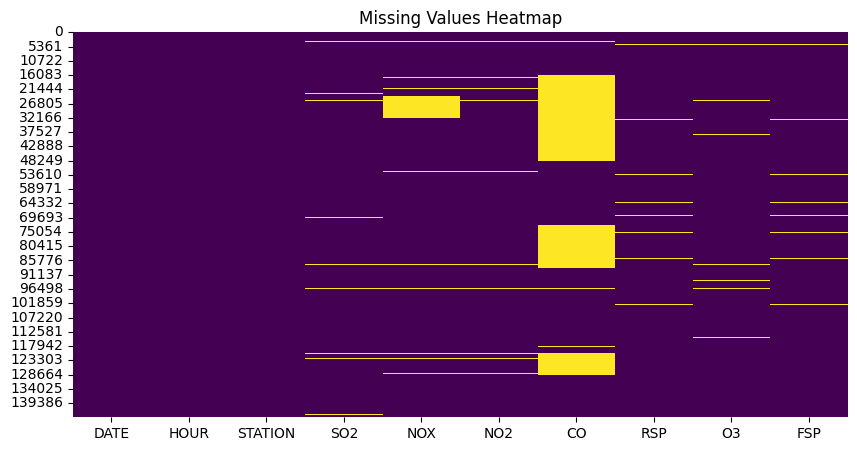

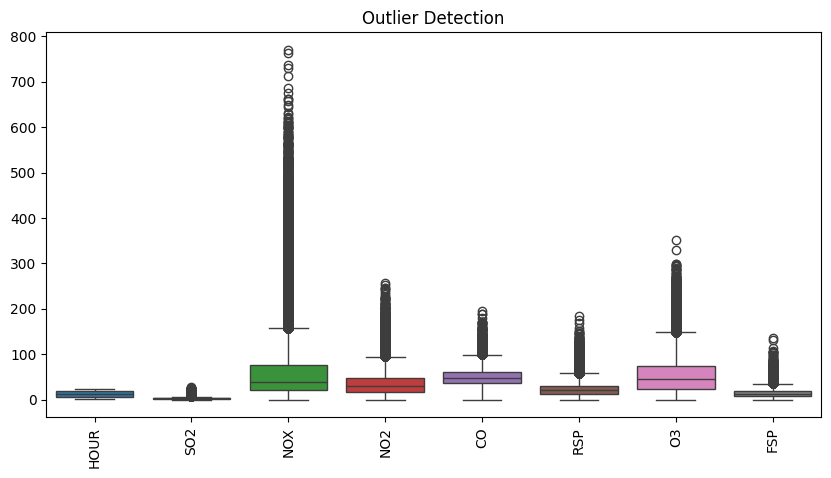

Column: STATION
['CAUSEWAY BAY' 'CENTRAL' 'CENTRAL/WESTERN' 'EASTERN' 'KWAI CHUNG'
 'KWUN TONG' 'MONG KOK' 'NORTH' 'SOUTHERN' 'SHAM SHUI PO' 'SHATIN'
 'TUNG CHUNG' 'TSEUNG KWAN O' 'TAP MUN' 'TUEN MUN' 'TAI PO' 'TSUEN WAN'
 'YUEN LONG']
------------------------------


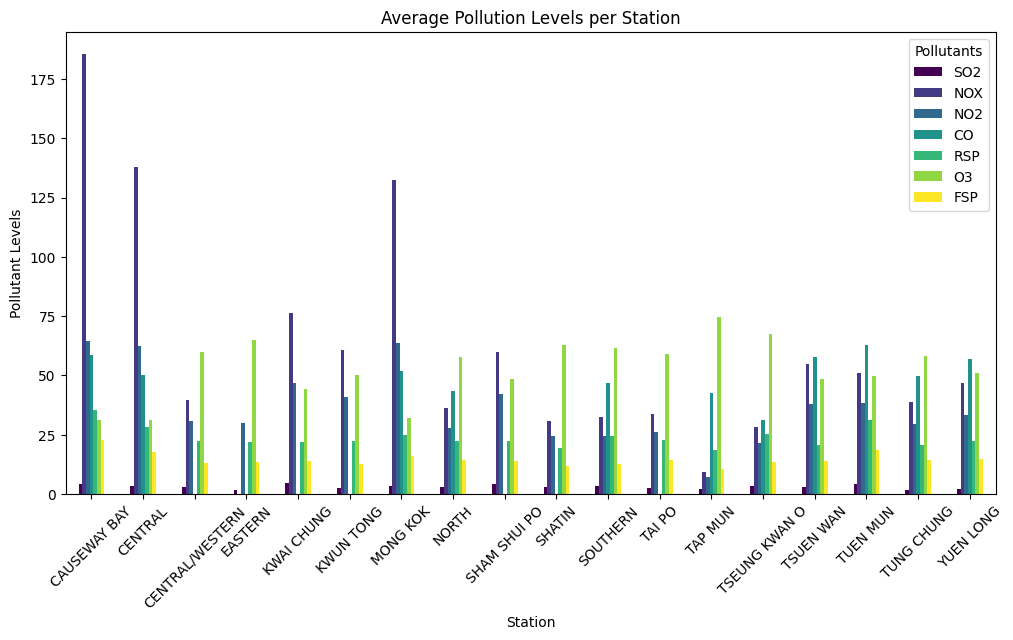

Column: SO2, Min: 0.0, Max: 28.0 , Mean:3.0368706892256445
Column: NOX, Min: 0.0, Max: 770.0 , Mean:61.88872795304697
Column: NO2, Min: 0.0, Max: 257.0 , Mean:36.197101593696395
Column: CO, Min: 0.0, Max: 195.0 , Mean:50.1530249523721
Column: RSP, Min: 0.0, Max: 185.0 , Mean:23.78404841810996
Column: O3, Min: 0.0, Max: 351.0 , Mean:52.992840484578686
Column: FSP, Min: 0.0, Max: 137.0 , Mean:14.58239793384325


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_env = pd.read_csv("../data/air_hourly.csv") 
column_names = ["SO2","NOX","NO2","CO","RSP","O3","FSP"]  # Replace with the actual column name

# Handle NA string and filter negative value
for column in column_names:
    df_env[column] = pd.to_numeric(df_env[column], errors='coerce')
    df_env[column] = df_env[column].apply(lambda x: x if x >= 0 else None)

# Replace NaN with None (null)
# df_env = df_env.dropna()

# Check basic info
print("Basic Info:")
print(df_env.info())

# Summary statistics
print("\nSummary Statistics:")
# print(df_gov.describe(include="all"))  # Show stats for numerical & categorical

# Check missing values
print("\nMissing Values:")
print(df_env.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df_env.duplicated().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df_env.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_env.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

# Check Category
cat_col = "STATION"
print(f"Column: {cat_col}")
print(df_env[cat_col].unique())  # Show unique categories
print("-" * 30)

df_grouped = df_env.groupby("STATION")[column_names].mean()

# Plot the data
df_grouped.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Average Pollution Levels per Station")
plt.xlabel("Station")
plt.ylabel("Pollutant Levels")
plt.legend(title="Pollutants")
plt.xticks(rotation=45)
plt.show()


# Check Min, Max, Mean
for col in column_names:
    mean = df_env[col].mean()
    min_val = df_env[col].min()
    max_val = df_env[col].max()
    count = len(df_env[col])
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")


## Environment Data Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144720 entries, 0 to 144719
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     144720 non-null  object 
 1   HOUR     144720 non-null  int64  
 2   STATION  144720 non-null  object 
 3   SO2      140491 non-null  float64
 4   NOX      132558 non-null  float64
 5   NO2      140491 non-null  float64
 6   CO       86084 non-null   float64
 7   RSP      140939 non-null  float64
 8   O3       141071 non-null  float64
 9   FSP      140938 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 11.0+ MB
None


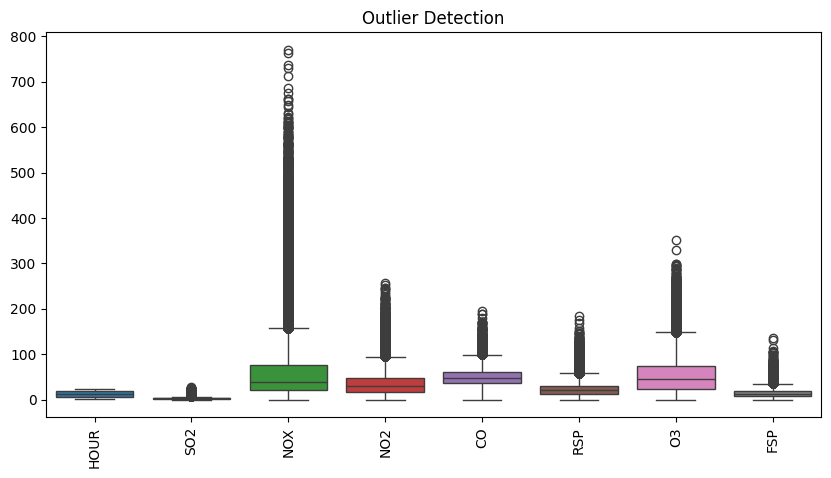


Records count: 82122

Missing Records:
DATE       0
HOUR       0
STATION    0
SO2        0
NOX        0
NO2        0
CO         0
RSP        0
O3         0
FSP        0
dtype: int64

Duplicate Rows: 0
Column: SO2, Min: 0.0, Max: 24.0 , Mean:3.00910839969801
Column: NOX, Min: 0.0, Max: 764.0 , Mean:67.95757531477558
Column: NO2, Min: 0.0, Max: 257.0 , Mean:37.2811061591291
Column: CO, Min: 0.0, Max: 195.0 , Mean:50.3081999951292
Column: RSP, Min: 0.0, Max: 185.0 , Mean:25.09305667178101
Column: O3, Min: 0.0, Max: 351.0 , Mean:51.44262195270451
Column: FSP, Min: 0.0, Max: 113.0 , Mean:15.496480845571224


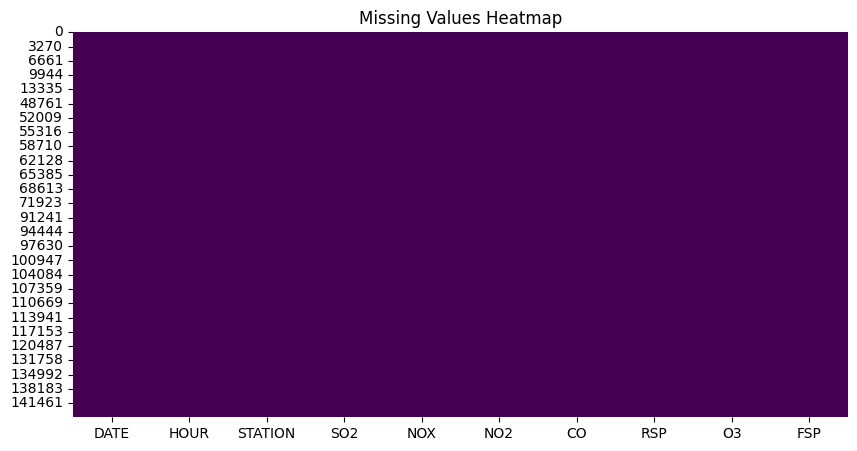

Column: STATION
['CAUSEWAY BAY' 'CENTRAL' 'MONG KOK' 'NORTH' 'SOUTHERN' 'TUNG CHUNG'
 'TSEUNG KWAN O' 'TAP MUN' 'TUEN MUN' 'TSUEN WAN' 'YUEN LONG']
------------------------------


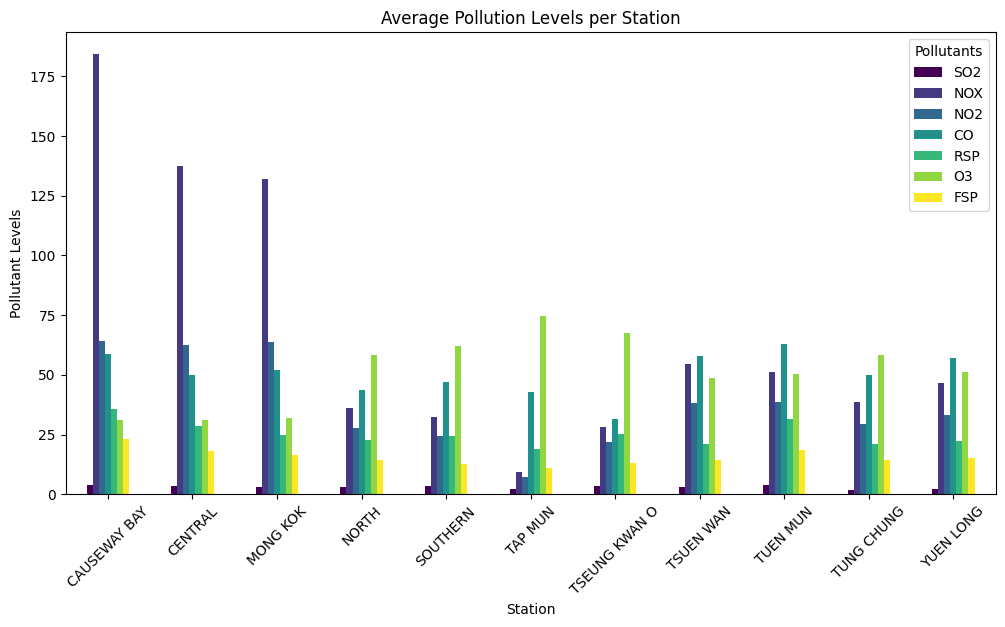

In [109]:
# Remove Outlier
# df_env_filtered = remove_outliers_quantile(df_env,column_names)
df_env_filtered = df_env    
print(df_env_filtered.info())

# Check outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_env_filtered.select_dtypes(include=["number"]))  # Only numeric columns
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()


# Remove Null
df_env_filtered = df_env_filtered.dropna()
print("\nRecords count:",len(df_env_filtered))
print("\nMissing Records:")
print(df_env_filtered.isna().sum())

# Remove Duplicates
df_gov.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", df_gov.duplicated().sum())


# Iterate through each column and print min/max
for col in column_names:
    mean = df_env_filtered[col].mean()
    min_val = df_env_filtered[col].min()
    max_val = df_env_filtered[col].max()
    count = len(df_env_filtered[col])
    print(f"Column: {col}, Min: {min_val}, Max: {max_val} , Mean:{mean}")

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df_env_filtered.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


# Check Category
col_cat = "STATION" 
print(f"Column: {col_cat}")
print(df_env_filtered[col_cat].unique())  # Show unique categories
print("-" * 30)

df_grouped = df_env_filtered.groupby("STATION")[column_names].mean()

# Plot the data
df_grouped.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Average Pollution Levels per Station")
plt.xlabel("Station")
plt.ylabel("Pollutant Levels")
plt.legend(title="Pollutants")
plt.xticks(rotation=45)
plt.show()



In [ ]:
## Environment Data Transformation

In [110]:
# Convert DATE and HOUR to datetime format
df_env_filtered['DATE'] = pd.to_datetime(df_env_filtered['DATE'], dayfirst=True)
# Handle HOUR == 24
df_env_filtered.loc[df_env_filtered['HOUR'] == 24, 'DATE'] += pd.Timedelta(days=1)
df_env_filtered['HOUR'] = df_env_filtered['HOUR'].replace(24, 0)  # Convert 24 to 00

# Create the report_timestamp column
df_env_filtered['report_datetime'] = pd.to_datetime(
    df_env_filtered['DATE'].astype(str) + ' ' + df_env_filtered['HOUR'].astype(str) + ':00:00',
    format='%Y-%m-%d %H:%M:%S'
)

# Drop the old DATE and HOUR columns
df_env_filtered.drop(columns=['DATE', 'HOUR'], inplace=True)
df_env_filtered = df_env_filtered[['report_datetime'] + [col for col in df_env_filtered.columns if col != 'report_datetime']]

# Change column name
df_env_filtered.rename(columns={'STATION': 'station','SO2': 'so2','NOX': 'no', 'NO2': 'no2','CO': 'co','RSP': 'rsp','O3': 'o3','FSP': 'fsp'}, inplace=True)

# Check the result
print(df_env_filtered.head())


# Total 11 sub district should have 91,344 records for 346 days
print(f"\nTotal Records: {len(df_env_filtered)}")
# Save merge file
df_env_filtered.to_csv("./air_quality_env_processed.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\1248029553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env_filtered['DATE'] = pd.to_datetime(df_env_filtered['DATE'], dayfirst=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\1248029553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env_filtered['HOUR'] = df_env_filtered['HOUR'].replace(24, 0)  # Convert 24 to 00
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\1248029553.py:8: SettingWithCopyWarning: 
A value is trying to be set 

      report_datetime       station  so2    no   no2    co   rsp     o3   fsp
0 2024-01-01 01:00:00  CAUSEWAY BAY  3.0  73.0  50.0  61.0  57.0   95.0  39.0
1 2024-01-01 02:00:00  CAUSEWAY BAY  3.0  63.0  37.0  56.0  55.0  104.0  35.0
2 2024-01-01 03:00:00  CAUSEWAY BAY  3.0  34.0  28.0  62.0  55.0  112.0  36.0
3 2024-01-01 04:00:00  CAUSEWAY BAY  3.0  41.0  28.0  66.0  61.0  112.0  40.0
5 2024-01-01 06:00:00  CAUSEWAY BAY  3.0  30.0  23.0  60.0  59.0  113.0  37.0

Total Records: 82122


In [ ]:
## Merge Data

In [107]:
# Mapping dictionary for district-station relationship
district_mapping = {
    'CENTRAL/WESTERN': 'Central and Western',
    'CENTRAL': 'Wan Chai',
    'MONG KOK': 'Kowloon City',
    'KWUN TONG': 'Kwun Tong',
    'SHAM SHUI PO': 'Yau Tsim Mong'
}

# Standardize station names in Dataset 2
df_env_filtered['district'] = df_env_filtered['station'].map(district_mapping)

# Merge datasets based on datetime and district
merged_df = df_gov_aggregated.merge(df_env_filtered, left_on=['report_datetime', 'lamppost_district_en'], 
                       right_on=['report_datetime', 'district'], how='left')

# Drop redundant columns
merged_df.drop(columns=['district','no_y','no2_y'], inplace=True)
merged_df.rename(columns={'lamppost_district_en': 'area','no_x': 'no','no2_x': 'no2'}, inplace=True)

# Display result
print(len(df_env_filtered))
print(len(df_gov_filtered))
print(merged_df)

# Save merge file
merged_df.to_csv("./merge_dataset.csv")




82122
866831
          report_datetime                 area         no        no2  \
0     2024-03-19 01:00:00  Central and Western  92.720457  83.798510   
1     2024-03-19 01:00:00         Kowloon City   6.846171  21.234300   
2     2024-03-19 01:00:00        Yau Tsim Mong  39.597257  56.611136   
3     2024-03-19 02:00:00  Central and Western  77.296267  82.530008   
4     2024-03-19 02:00:00         Kowloon City   5.834400  14.459092   
...                   ...                  ...        ...        ...   
38754 2025-02-28 15:00:00         Kowloon City   2.778880  81.522495   
38755 2025-02-28 15:00:00            Kwun Tong   1.638000  20.106427   
38756 2025-02-28 15:00:00             Sai Kung   4.473300  20.220011   
38757 2025-02-28 15:00:00             Wan Chai   8.619260  49.787419   
38758 2025-02-28 15:00:00        Yau Tsim Mong  27.973833  75.339254   

           pm2_5   station  so2    co   rsp    o3   fsp  
0      11.319048       NaN  NaN   NaN   NaN   NaN   NaN  
1     